## Missing Indicators

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [4]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [7]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [8]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\uzebk\AppData\Local\Temp\ipykernel_18880\3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C

In [9]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([29. , 26. , 43. , 35. ,  4. , 60. , 36. ,  2. , 37. , 30. , 34. ,
       30. , 25. , 23. , 18. , 29. ,  8. , 32. , 57. , 24. ,  9. , 60. ,
       33. , 10. , 20. , 27. , 30. , 21. , 54. ,  4. , 41. , 40.5, 19. ,
       61. , 48. , 24. , 39. , 30. , 27. , 28. ,  9. , 20. , 40. , 40. ,
       17. ,  8. , 21. , 29. , 28. , 31. , 42. , 24. ,  9. , 42. , 44. ,
        9. , 20. , 11. , 27. , 23. ,  3. ,  1. , 30. , 32.5, 44. , 51. ,
       22. , 37. , 33. , 43. ,  4. , 54. ,  8. , 38. , 24. , 35. , 45. ,
       20. , 25. , 36. , 28. , 24. , 18. , 24. , 28. , 56. , 70.5, 16. ,
       71. , 22. , 39. , 31. , 19. ,  5. , 62. , 24. , 23. , 33. ,  7. ,
       18. , 36. , 36.5, 18. , 29. , 19. , 47. , 18. , 14. , 12. , 45. ,
       48. , 30. , 16. ,  2. , 60. , 35. , 37. , 18. , 25. , 58. , 16. ,
       31. , 19. , 42. , 38. , 17. , 24. , 25. , 11. , 24. , 25. , 24. ,
       16. , 52. ,  4. , 32. , 45. , 21. , 29. , 22. , 28. ,  5. , 25. ,
       41. , 48. , 49. , 34. , 48. ])

In [10]:
X_train['Age'].isnull().sum()

np.int64(148)

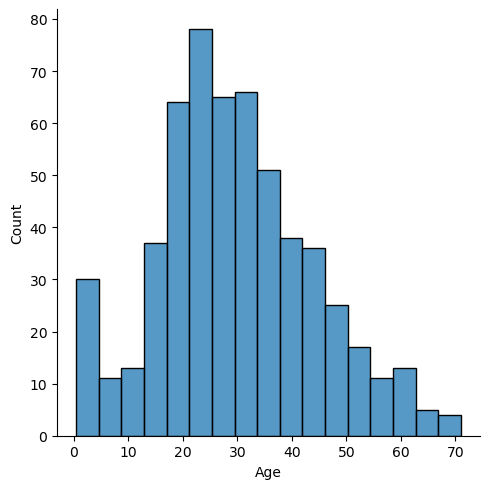

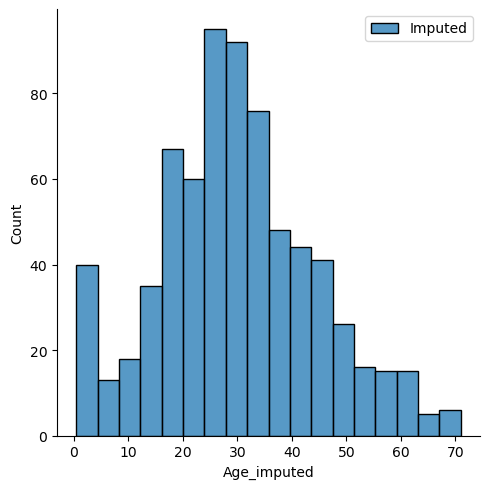

In [11]:
sns.displot(X_train['Age'],label='Original')
sns.displot(X_train['Age_imputed'],label = 'Imputed')

plt.legend()
plt.show()

In [12]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  207.16522909476305


In [13]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,55.222905
Age,71.512440,204.349513,204.349513
Age_imputed,55.222905,204.349513,207.165229


<Axes: >

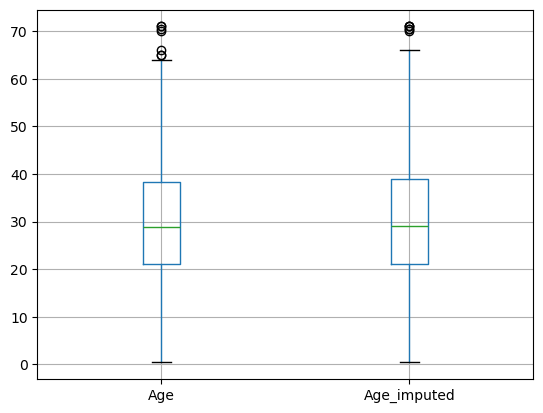

In [14]:
X_train[['Age', 'Age_imputed']].boxplot()

In [16]:
# Select an observation from X_test, for example the first row
observation = X_test.iloc[0]

sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

In [17]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [18]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [19]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [20]:
X = data
y = data['SalePrice']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [22]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [23]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1189,TA,TA,189000,TA,TA
1408,NaN,TA,125500,TA,NaN
749,NaN,TA,98000,TA,NaN
796,TA,TA,143500,TA,TA
912,NaN,TA,88000,TA,NaN


In [24]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\uzebk\AppData\Local\Temp\ipykernel_18880\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual

In [25]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [26]:
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.036815
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [27]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.649832
TA,0.412439,0.537598
Fa,0.040917,0.053872
Po,0.027823,0.035915
Ex,0.024550,0.033670


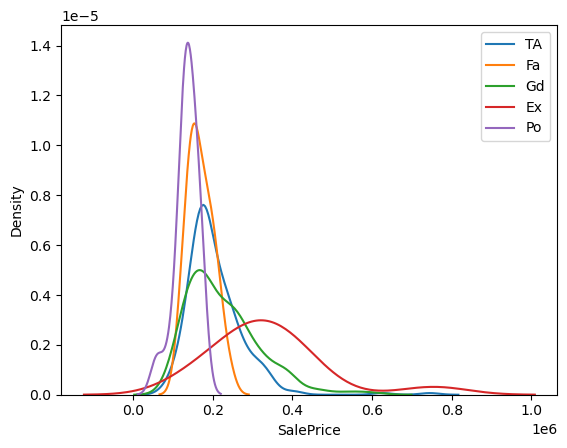

In [29]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], label=category)
plt.legend()
plt.show()

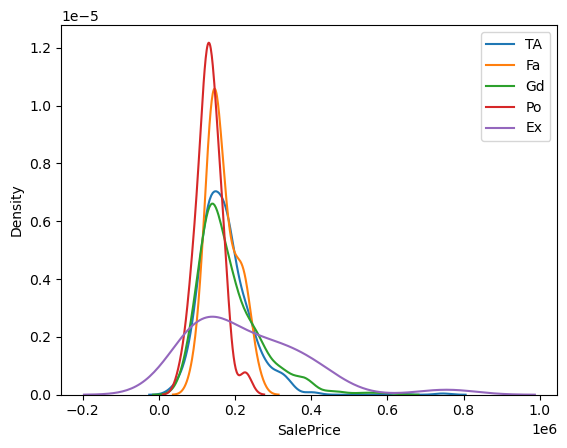

In [31]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], label=category)
plt.legend()
plt.show()

## Missing Indicator

In [32]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [33]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [35]:
from sklearn.impute import MissingIndicator,SimpleImputer

In [36]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [37]:
X_train_trf

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]], shape=(712, 2))

In [38]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

In [39]:
mi = MissingIndicator()

mi.fit(X_train)

,missing_values,nan
,features,'missing-only'
,sparse,'auto'
,error_on_new,True


In [40]:
mi.features_

array([0])

In [41]:
X_train_missing = mi.transform(X_train)

In [42]:
X_train_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [43]:
X_test_missing = mi.transform(X_test)

In [44]:
X_test_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [45]:
X_train['Age_NA'] = X_train_missing

In [47]:
X_train

,Age,Fare,Age_NA
30,40.0,27.7208,False
10,4.0,16.7000,False
873,47.0,9.0000,False
182,9.0,31.3875,False
876,20.0,9.8458,False
...,...,...,...
534,30.0,8.6625,False
584,NaN,8.7125,True
493,71.0,49.5042,False
527,NaN,221.7792,True


In [49]:
si = SimpleImputer()

# Only use the columns present during the original fit
X_train_trf2 = si.fit_transform(X_train[['Age', 'Fare']])
X_test_trf2 = si.transform(X_test[['Age', 'Fare']])

In [52]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

In [56]:
si = SimpleImputer(add_indicator=True)

In [57]:
X_train = si.fit_transform(X_train)

In [58]:
X_test = si.transform(X_test)

In [59]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [61]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [63]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [66]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [67]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [68]:
from sklearn import set_config

set_config(display='diagram')
clf

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [69]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [70]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [71]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.788


In [72]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
7,1.0,constant,median,0.787852
6,1.0,constant,mean,0.787852
5,1.0,most_frequent,median,0.787852
4,1.0,most_frequent,mean,0.787852
11,10.0,constant,median,0.787852
10,10.0,constant,mean,0.787852
9,10.0,most_frequent,median,0.787852
8,10.0,most_frequent,mean,0.787852
12,100.0,most_frequent,mean,0.787852
13,100.0,most_frequent,median,0.787852


## KNN IMPUTER

In [73]:
from sklearn.impute import KNNImputer,SimpleImputer

In [74]:
df = pd.read_csv('train.csv')[['Age','Pclass','Fare','Survived']]

In [75]:
df.head()

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [76]:
df.isnull().mean() * 100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [77]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [85]:
knn = KNNImputer(n_neighbors=4,weights='distance')

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

In [86]:
lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.7039106145251397

In [81]:
# Comparision with Simple Imputer --> mean

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [82]:
lr = LogisticRegression()

lr.fit(X_train_trf2,y_train)

y_pred2 = lr.predict(X_test_trf2)

accuracy_score(y_test,y_pred2)

0.6927374301675978

## MICE ALGORITHM

In [87]:
df = np.round(pd.read_csv('50_Startups.csv')[['R&D Spend','Administration','Marketing Spend','Profit']]/10000)
np.random.seed(9)
df = df.sample(5)
df

,R&D Spend,Administration,Marketing Spend,Profit
21,8.0,15.0,30.0,11.0
37,4.0,5.0,20.0,9.0
2,15.0,10.0,41.0,19.0
14,12.0,16.0,26.0,13.0
44,2.0,15.0,3.0,7.0


In [88]:
df = df.iloc[:,0:-1]
df

,R&D Spend,Administration,Marketing Spend
21,8.0,15.0,30.0
37,4.0,5.0,20.0
2,15.0,10.0,41.0
14,12.0,16.0,26.0
44,2.0,15.0,3.0


In [90]:
df.iloc[1,0] = np.nan
df.iloc[3,1] = np.nan
df.iloc[-1,-1] = np.nan

C:\Users\uzebk\AppData\Local\Temp\ipykernel_18880\766688332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[1,0] = np.nan
C:\Users\uzebk\AppData\Local\Temp\ipykernel_18880\766688332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[3,1] = np.nan
C:\Users\uzebk\AppData\Local\Temp\ipykernel_18880\766688332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[-1,-1] = np.nan


In [91]:
df.head()

,R&D Spend,Administration,Marketing Spend
21,8.0,15.0,30.0
37,NaN,5.0,20.0
2,15.0,10.0,41.0
14,12.0,NaN,26.0
44,2.0,15.0,NaN


In [92]:
# Step 1 - Impute all missing values with mean of respective col

df0 = pd.DataFrame()

df0['R&D Spend'] = df['R&D Spend'].fillna(df['R&D Spend'].mean())
df0['Administration'] = df['Administration'].fillna(df['Administration'].mean())
df0['Marketing Spend'] = df['Marketing Spend'].fillna(df['Marketing Spend'].mean())

In [93]:
# 0th Iteration
df0

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,9.25,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.25,26.00
44,2.00,15.00,29.25


In [95]:
# Remove the col1 imputed value
df1 = df0.copy()

df1.iloc[1,0] = np.nan

df1

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.25,26.00
44,2.0,15.00,29.25


In [96]:
# Use first 3 rows to build a model and use the last for prediction

X = df1.iloc[[0,2,3,4],1:3]
X

,Administration,Marketing Spend
21,15.00,30.00
2,10.00,41.00
14,11.25,26.00
44,15.00,29.25


In [97]:
y = df1.iloc[[0,2,3,4],0]
y

21     8.0
2     15.0
14    12.0
44     2.0
Name: R&D Spend, dtype: float64

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[1,1:].values.reshape(1,2))

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.14158651])

In [100]:
df1.iloc[1,0] = 23.14

In [101]:
df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.25,26.00
44,2.00,15.00,29.25


In [103]:
# Remove the col2 imputed value

df1.iloc[3,1] = np.nan

df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.0,30.00
37,23.14,5.0,20.00
2,15.00,10.0,41.00
14,12.00,NaN,26.00
44,2.00,15.0,29.25


In [104]:
# Use last 3 rows to build a model and use the first for prediction
X = df1.iloc[[0,1,2,4],[0,2]]
X

,R&D Spend,Marketing Spend
21,8.00,30.00
37,23.14,20.00
2,15.00,41.00
44,2.00,29.25


In [105]:
y = df1.iloc[[0,1,2,4],1]
y

21    15.0
37     5.0
2     10.0
44    15.0
Name: Administration, dtype: float64

In [106]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[3,[0,2]].values.reshape(1,2))

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.06331285])

In [107]:
df1.iloc[3,1] = 11.06

In [108]:
df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.06,26.00
44,2.00,15.00,29.25


In [110]:
# Remove the col3 imputed value
df1.iloc[4,-1] = np.nan

df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.0
37,23.14,5.00,20.0
2,15.00,10.00,41.0
14,12.00,11.06,26.0
44,2.00,15.00,NaN


In [111]:
# Use last 3 rows to build a model and use the first for prediction
X = df1.iloc[0:4,0:2]
X

,R&D Spend,Administration
21,8.00,15.00
37,23.14,5.00
2,15.00,10.00
14,12.00,11.06


In [112]:
y = df1.iloc[0:4,-1]
y

21    30.0
37    20.0
2     41.0
14    26.0
Name: Marketing Spend, dtype: float64

In [113]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[4,0:2].values.reshape(1,2))

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31.56351448])

In [114]:
df1.iloc[4,-1] = 31.56

In [115]:
# After 1st Iteration
df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.06,26.00
44,2.00,15.00,31.56


In [116]:
# Subtract 0th iteration from 1st iteration

df1 - df0

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.00
37,13.89,0.00,0.00
2,0.00,0.00,0.00
14,0.00,-0.19,0.00
44,0.00,0.00,2.31


In [118]:
df2 = df1.copy()

df2.iloc[1,0] = np.nan

df2

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.06,26.00
44,2.0,15.00,31.56


In [119]:
X = df2.iloc[[0,2,3,4],1:3]
y = df2.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[1,1:].values.reshape(1,2))

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.78627207])

In [120]:
df2.iloc[1,0] = 23.78

In [122]:
df2.iloc[3,1] = np.nan
X = df2.iloc[[0,1,2,4],[0,2]]
y = df2.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[3,[0,2]].values.reshape(1,2))

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.22020174])

In [123]:
df2.iloc[3,1] = 11.22

In [125]:
df2.iloc[4,-1] = np.nan

X = df2.iloc[0:4,0:2]
y = df2.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[4,0:2].values.reshape(1,2))

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38.87979054])

In [126]:
df2.iloc[4,-1] = 31.56

In [127]:
df2

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.78,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.22,26.00
44,2.00,15.00,31.56


In [128]:
df2 - df1

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.0
37,0.64,0.00,0.0
2,0.00,0.00,0.0
14,0.00,0.16,0.0
44,0.00,0.00,0.0


In [130]:
df3 = df2.copy()

df3.iloc[1,0] = np.nan

df3

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.22,26.00
44,2.0,15.00,31.56


In [131]:
X = df3.iloc[[0,2,3,4],1:3]
y = df3.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[1,1:].values.reshape(1,2))

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24.57698058])

In [132]:
df3.iloc[1,0] = 24.57

In [134]:
df3.iloc[3,1] = np.nan
X = df3.iloc[[0,1,2,4],[0,2]]
y = df3.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[3,[0,2]].values.reshape(1,2))

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.37282844])

In [135]:
df3.iloc[3,1] = 11.37

In [137]:
df3.iloc[4,-1] = np.nan

X = df3.iloc[0:4,0:2]
y = df3.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[4,0:2].values.reshape(1,2))

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45.53976417])

In [138]:
df3.iloc[4,-1] = 45.53

In [139]:
df2.iloc[3,1] = 11.22

In [140]:
df3

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,24.57,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.37,26.00
44,2.00,15.00,45.53


In [141]:
df3 - df2

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.00
37,0.79,0.00,0.00
2,0.00,0.00,0.00
14,0.00,0.15,0.00
44,0.00,0.00,13.97


## Outlier Detection And Z-score Method

In [143]:
df = pd.read_csv('placements.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [144]:
df.shape

(1000, 3)

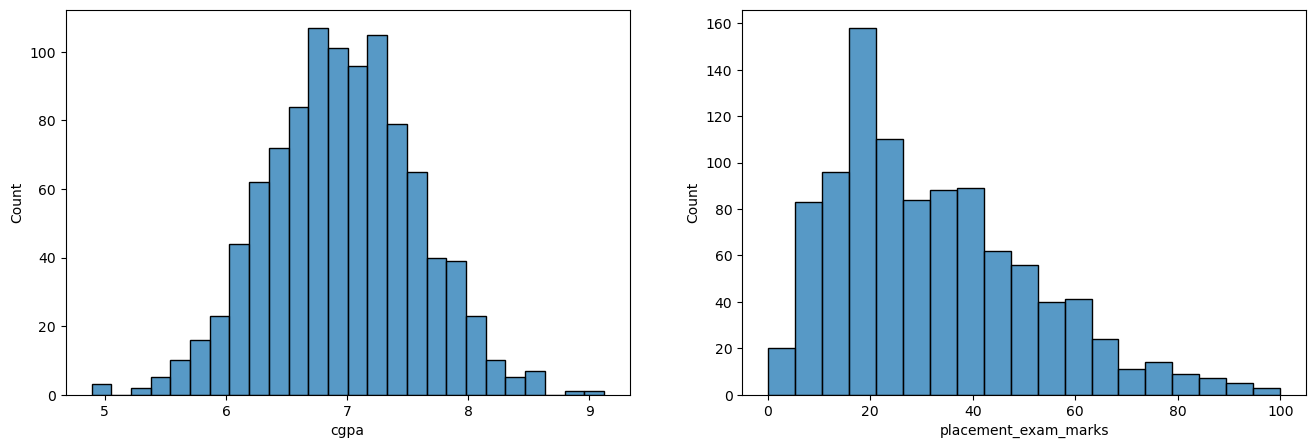

In [147]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'])

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'])

plt.show()

In [148]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [149]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [150]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [151]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### Trimming 

In [152]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [153]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [154]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [155]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [156]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [157]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [158]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


### Capping

In [159]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [160]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [161]:
df.shape

(1000, 4)

In [162]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.474376e-16
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00


## IQR Methods

In [165]:
df = pd.read_csv('placements.csv')

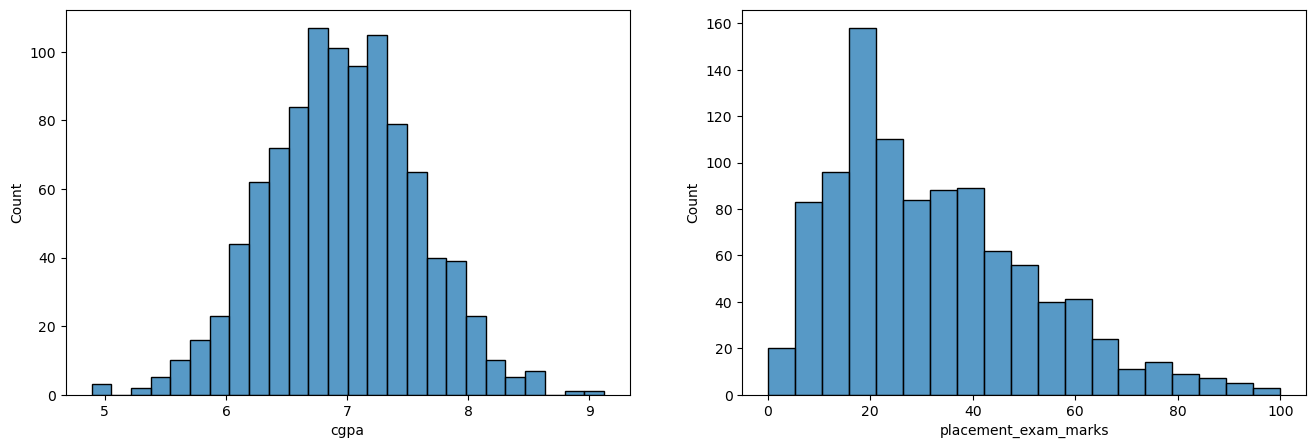

In [167]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'])

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'])

plt.show()

In [168]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

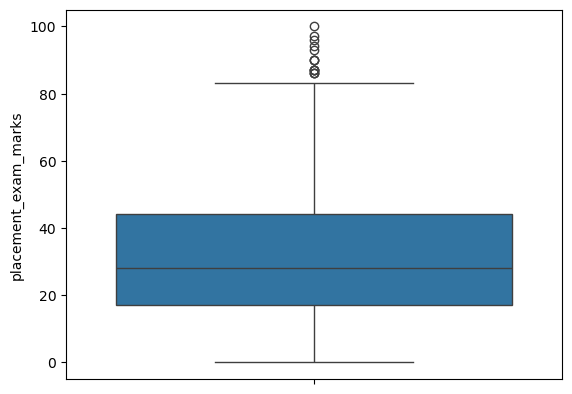

In [169]:
sns.boxplot(df['placement_exam_marks'])

In [170]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [171]:
iqr = percentile75 - percentile25

In [172]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [173]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [174]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [175]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [176]:
new_df.shape

(985, 3)

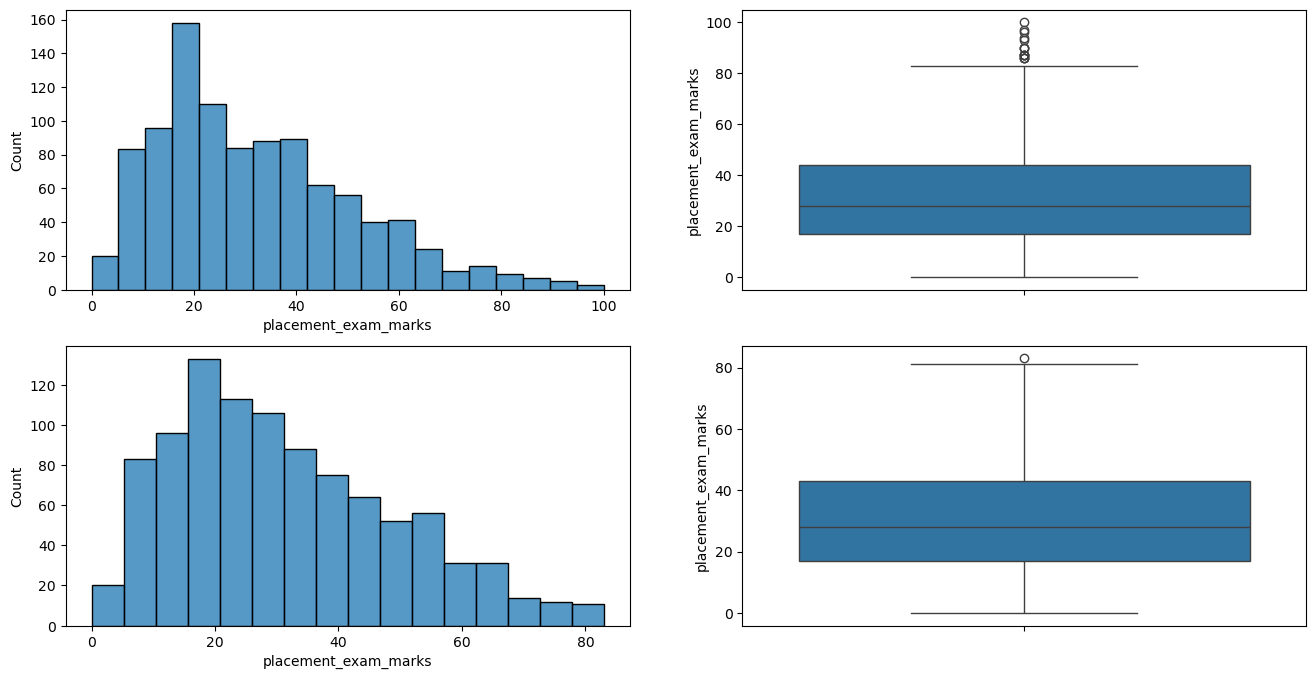

In [177]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

In [178]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [179]:
# Example: select rows where the first column (Age) is greater than 30
condition = X_test_trf2[:, 0] > 30
np.where(condition, True, False)

array([ True, False, False, False, False, False,  True, False,  True,
       False,  True,  True,  True, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
        True, False,  True, False,  True, False, False,  True, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True, False, False,  True,  True,  True, False,  True,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False,  True,  True,  True, False,  True, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
        True, False,

In [ ]:
new_df_cap.shape

(1000, 3)

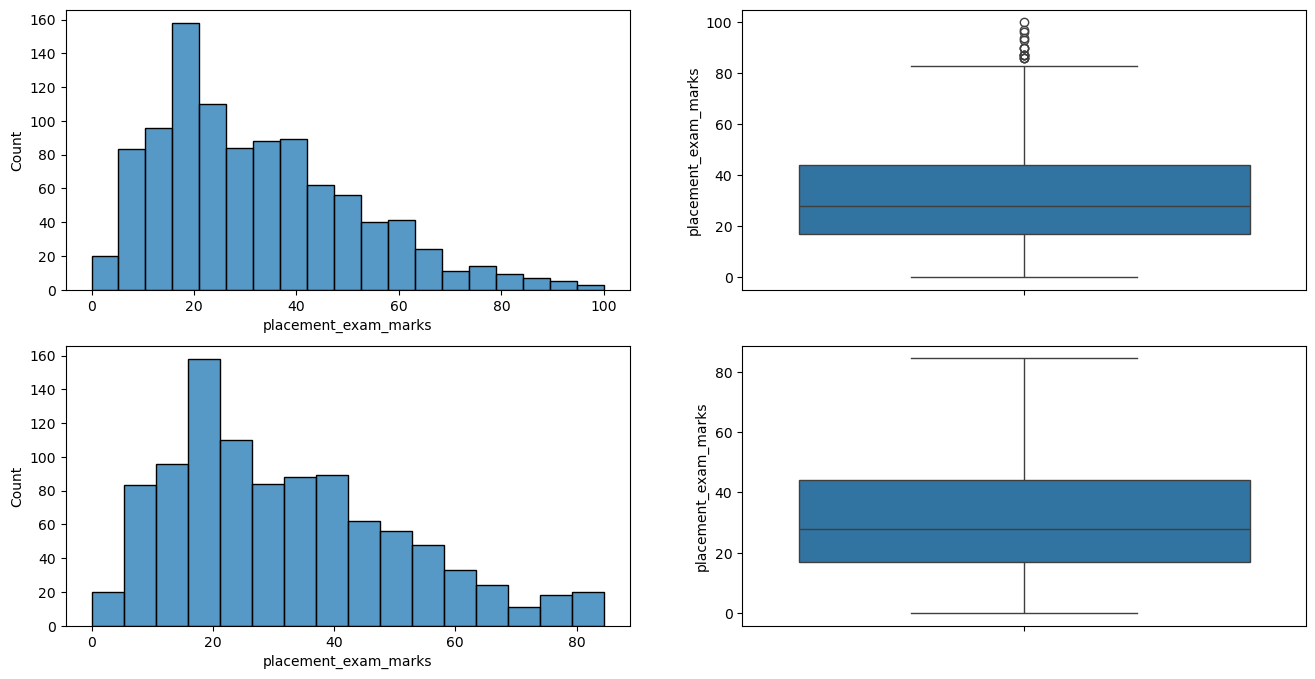

In [181]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()

## USING PERCENTILE METHOD

In [182]:
df=pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [183]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Density'>

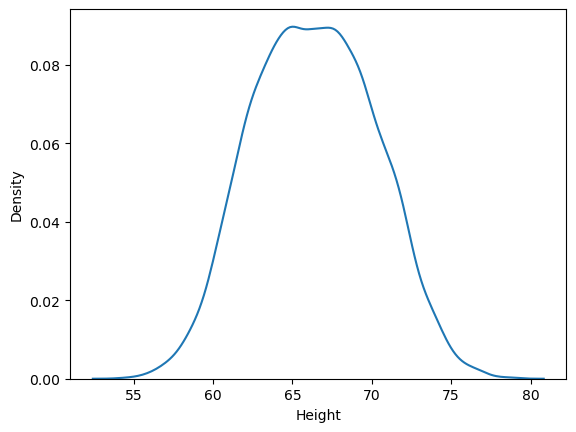

In [184]:
sns.kdeplot(df['Height'])

<Axes: ylabel='Height'>

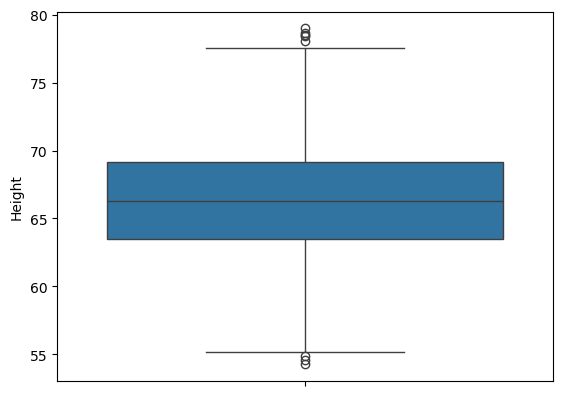

In [185]:
sns.boxplot(df['Height'])

In [186]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

np.float64(74.7857900583366)

In [187]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

np.float64(58.13441158671655)

In [188]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [189]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

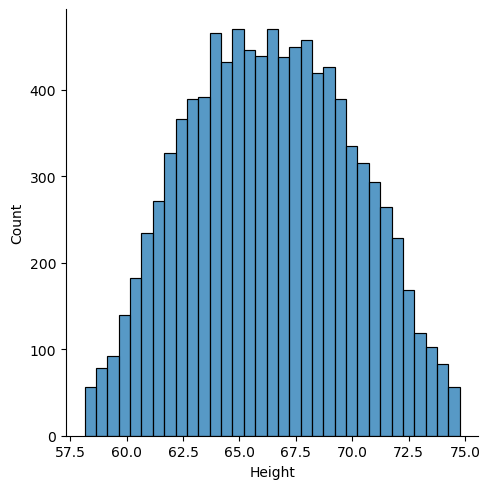

In [190]:
sns.displot(new_df['Height'])

<Axes: ylabel='Height'>

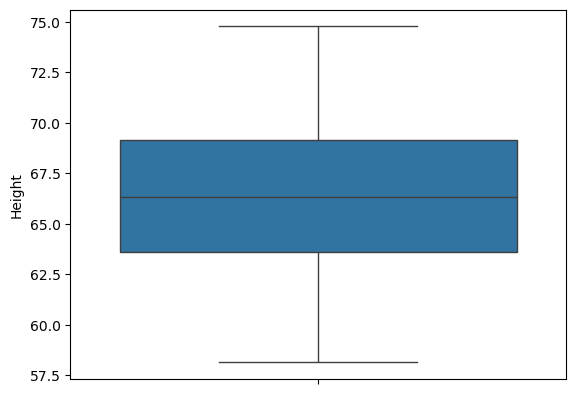

In [191]:
sns.boxplot(new_df['Height'])

In [192]:
# Capping --> Winsorization
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [193]:
df.shape

(10000, 3)

In [194]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64